In [51]:
import pandas as pd

dfR1 = pd.read_excel("Data/riket2023_åk9_np.xlsx", skiprows=8)
xlsx_file = pd.read_excel("Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)
dfR1_eng = xlsx_file["Engelska"]
dfR1_mat = xlsx_file["Matematik"]
dfR1_sve = xlsx_file["Svenska"]
dfR1_sve_and = xlsx_file["Svenska som andraspråk"]

In [52]:
def rename_columns(df, rename_dict):
    return df.rename(columns=rename_dict)

rename_dict = {

    "Riket": "Plats",
    "Typ av huvudman": "Huvudman",
    "Totalt": "Totalt (A-F)",
    "Flickor": "Flickor (A-F)",
    "Pojkar": "Pojkar (A-F)",
    "Totalt ": "Totalt (A-E)",
    "Flickor ": "Flickor (A-E)",
    "Pojkar ": "Pojkar (A-E)",
    "Totalt  ": "Totalt (Poäng)",
    "Flickor  ": "Flickor (Poäng)",
    "Pojkar  ": "Pojkar (Poäng)",
}

dfR1_eng = rename_columns(xlsx_file["Engelska"], rename_dict)
dfR1_mat = rename_columns(xlsx_file["Matematik"], rename_dict) 
dfR1_sve = rename_columns(xlsx_file["Svenska"], rename_dict)
dfR1_sve_and = rename_columns(xlsx_file["Svenska som andraspråk"], rename_dict)

print(dfR1_sve_and.head())

   Plats    Huvudman Totalt (A-F) Flickor (A-F) Pojkar (A-F) Totalt (A-E)  \
0  Riket    Samtliga        14092          6447         7645         77.7   
1  Riket    Kommunal        11963          5495         6468         75.9   
2  Riket     Enskild         2122           949         1173         87.7   
3  Riket  Skolverket           ..            ..           ..           ..   

  Flickor (A-E) Pojkar (A-E) Totalt (Poäng) Flickor (Poäng) Pojkar (Poäng)  
0          81.6         74.3            9.4            10.2            8.7  
1            80         72.4              9             9.9            8.3  
2          90.9         85.2           11.1              12           10.4  
3            ..           ..             ..              ..             ..  


In [53]:
import dataframe_image as dfi

# Save the styled DataFrame to a PNG file
dfi.export(dfR1_eng, "Visualiseringar/A)-Statistic.png")

In [55]:
#Create the variables

#B)

TotalF = dfR1_mat["Flickor (A-F)"][0]
TotalP = dfR1_mat["Pojkar (A-F)"][0]

PassingGradeF = dfR1_mat["Flickor (A-E)"][0]
PassingGradeP = dfR1_mat["Pojkar (A-E)"][0]

#Create the function
#I wantted to round it up without importing the math function since it is too much. G
def calculate_percentage(total, passinggrade):
    temp = ((total * ((100 - passinggrade) / 100)) + 0.99999) // 1
    return int(temp)

# It now shows the math sheet.

print("Boys with passing grande:",(calculate_percentage(TotalF,PassingGradeF)))
print("Girls with passing grande:",(calculate_percentage(TotalP, PassingGradeP)))

Boys with passing grande: 5825
Girls with passing grande: 5798


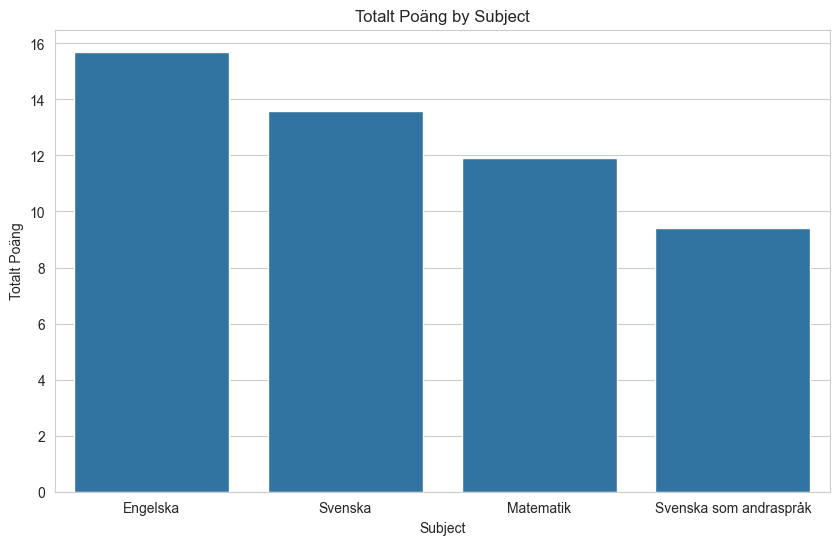

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Some basic descending list, will try to make it more fancy and the export it.

eng_score = dfR1_eng["Totalt (Poäng)"][0]
mat_score = dfR1_mat["Totalt (Poäng)"][0]
sve_score = dfR1_sve["Totalt (Poäng)"][0]
sve_andra_score = dfR1_sve_and["Totalt (Poäng)"].iloc[0]

scores_df = pd.DataFrame({
    'Subject': ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'],
    'Totalt Poäng': [eng_score, mat_score, sve_score, sve_andra_score]
})

scores_df_sorted = scores_df.sort_values(by='Totalt Poäng', ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Subject', y='Totalt Poäng',
                      data=scores_df_sorted)

plt.title('Totalt Poäng by Subject')
plt.xlabel('Subject')
plt.ylabel('Totalt Poäng')

plt.show()